# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [31]:
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [10]:
# Your code here.

student_data = pd.DataFrame({'ages': age, 'tardies': tardies})
student_data

,ages,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

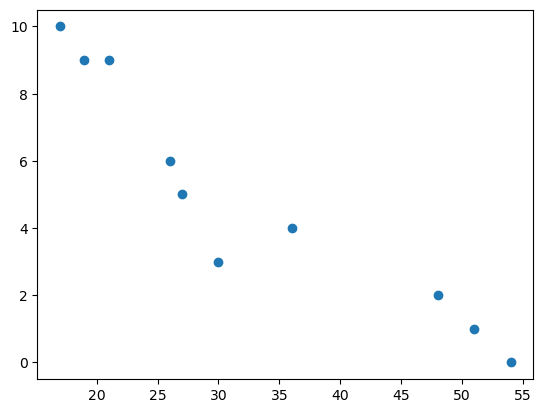

In [11]:
# Your code here.

#I'm calling them ages and tardies, rather than x and y for now. If needed I'll change this later on.

plt.scatter(ages,tardies)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

## The scatter plot indiates the initial theory is correct. We see a trend where the older the student is (higher x),
## the less tardiness they have (lower y)


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# Your response here.

#correlation:

print(student_data.corr())

## Correlation is very close to 1, which indicates a very strong correlation between ages and tardies. The negative sign
# in tardiness happens as it decreases whilst ages increases. 

#covariance:

print(student_data.cov())

## Covariance is a different way to describe the linear relationship between two variables, but it doesn't represent
#well the strenght of that relationship because of the units used. However, similarly as the correlation,
#tardies have a negative covariance with ages, with shows one increases as other decreases.


             ages   tardies
ages     1.000000 -0.939163
tardies -0.939163  1.000000
               ages    tardies
ages     187.655556 -45.566667
tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here.

# age is the independent variable (what will help us to predict tardiness)
# tardiness is the dependent variable (what we want to predict/measure)

x = student_data[["ages"]]
y = student_data["tardies"]

model = linear_model.LinearRegression()
result = model.fit(x,y)

## I'm using a liner regression as the relationship between the variables appears to be linear. Outcome/target variable,
## as stated above, is the tardiness

Plot your regression model on your scatter plot.

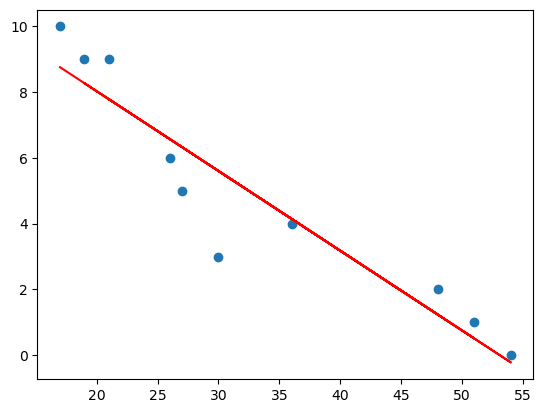

In [18]:
# Your code here.

regression_line = result.intercept_ + result.coef_[0] * x
plt.plot(x, regression_line, c = "red")
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## We can see the line manages to represent the data quite well, not being very distanced from any of the data points.
## We can say that age is indeed a good predictor of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("/Users/caionunez/Desktop/Ironhack/Week4/lab-regression-analysis/your-code/vehicles.csv")
print(vehicles.shape)
vehicles.head()

(35952, 15)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
# Your response here. 

vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

## As per the correlation matrix below, fuel barrels/year is the variable that will be the most important to determine
# the C02 emissions. On the other hand, the Year variable alone is the one that provides the least amount of info
# regarding the C02 emissions

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here. 

## From what I understand our objective is to predict the CO2 based on certain variables, so I think linear regression
# is the most appropriate as this seems like a regression problem.


x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles["CO2 Emission Grams/Mile"]

model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0] * x

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [33]:
# Your response here. 

print(model.summary())

#I'm trying to follow what's on the regression lesson pill and use summary method but it's not working.

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [34]:
## I'll just do this instead.

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Print the R-squared value
print('R-squared:', model.score(x, y))

Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept: 769.8882836465598
R-squared: 0.9808734920269122


In [ ]:
## I believe the key takeaway is the third coefficient value, which is the Fuel Barrels / Year, being quite high
## in comparison to the others. I'd say this is aligned with what was found in the correlation matrix, showing that
#this is the variable that has the highest impact on the C02 emissions

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [36]:
# Your code here.

X = pd.Series([1, 3, 4, 6, 8, 9, 11, 14])
Y = pd.Series([1, 2, 4, 4, 5, 7, 8, 13])

df = pd.concat([X, Y], axis=1, keys=['invites', 'attends'])
df

,invites,attends
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

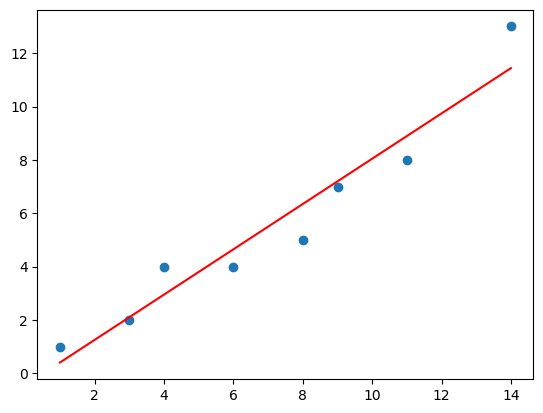

In [37]:
# Your code here.

x = df[["invites"]]
y = df["attends"]

model = linear_model.LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0] * x
plt.plot(x, regression_line, c = "red")
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [40]:
# Your response here. 

print("Intercept: ", result.intercept_)
print("Coefficient: ", result.coef_)
print('R-squared:', model.score(x, y))

Intercept:  -0.43939393939393945
Coefficient:  [0.84848485]
R-squared: 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [41]:
# Your response here. 

## I don't really see points that are REALLY problematic, but for the sake of the exercise I'm removing two in which
#the difference betweeen invites and attends was the hightest. I've also don't see the number of no shows increasing
#with the number of invited people, which was the party host initial concern.

## I also understand that visually the last point is the one that looks more apart, but it's just one unit away
#whilst the removed points were three units away.

X = pd.Series([1, 3, 4, 6, 9, 14])
Y = pd.Series([1, 2, 4, 4, 7, 13])

df = pd.concat([X, Y], axis=1, keys=['invites', 'attends'])
df

,invites,attends
0,1,1
1,3,2
2,4,4
3,6,4
4,9,7
5,14,13


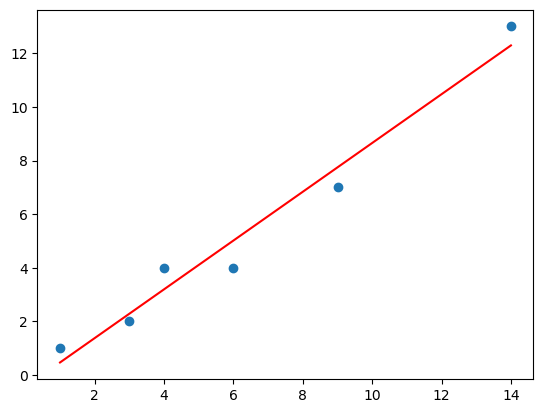

In [42]:
x = df[["invites"]]
y = df["attends"]

model = linear_model.LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0] * x
plt.plot(x, regression_line, c = "red")
plt.scatter(x,y)
plt.show()

In [43]:
print("Intercept: ", result.intercept_)
print("Coefficient: ", result.coef_)
print('R-squared:', model.score(x, y))

Intercept:  -0.4436090225563891
Coefficient:  [0.90977444]
R-squared: 0.967334857354282


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

## The coefficient and the R-squared increased, and the regression line "explains" the data even better, with a very
# thin margin of error. The initial concern from the party host doesn't seem to fit reality. 